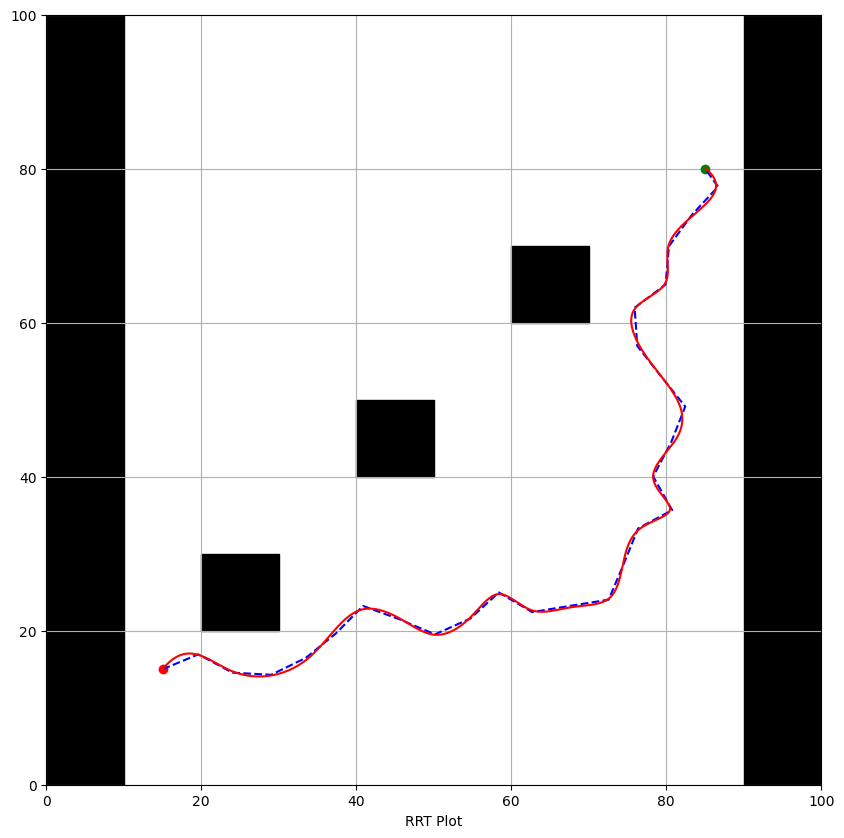

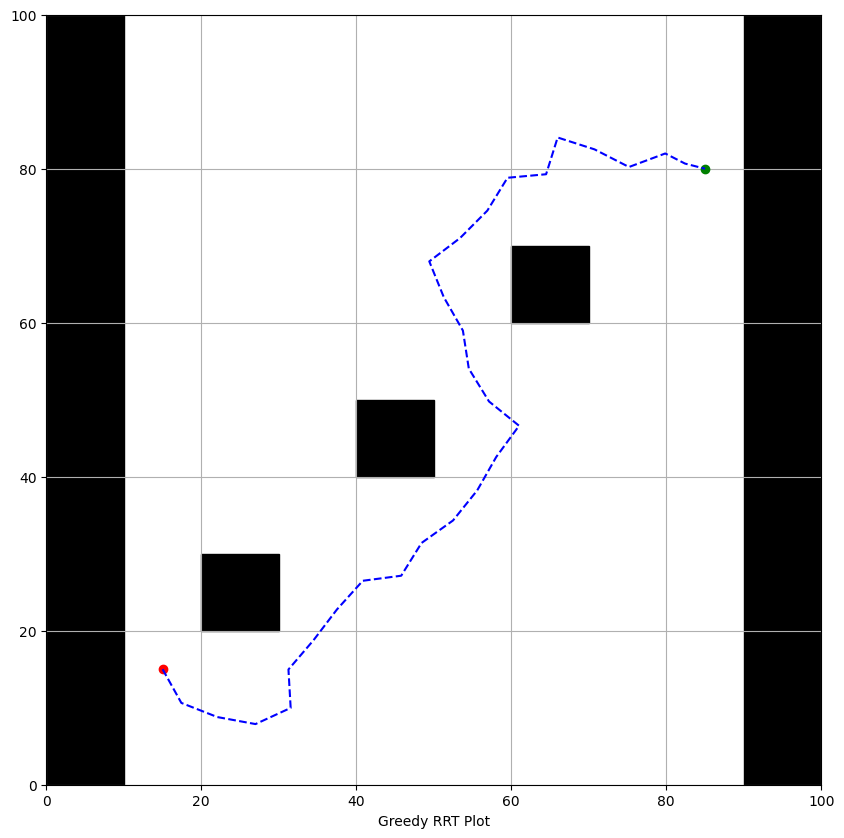

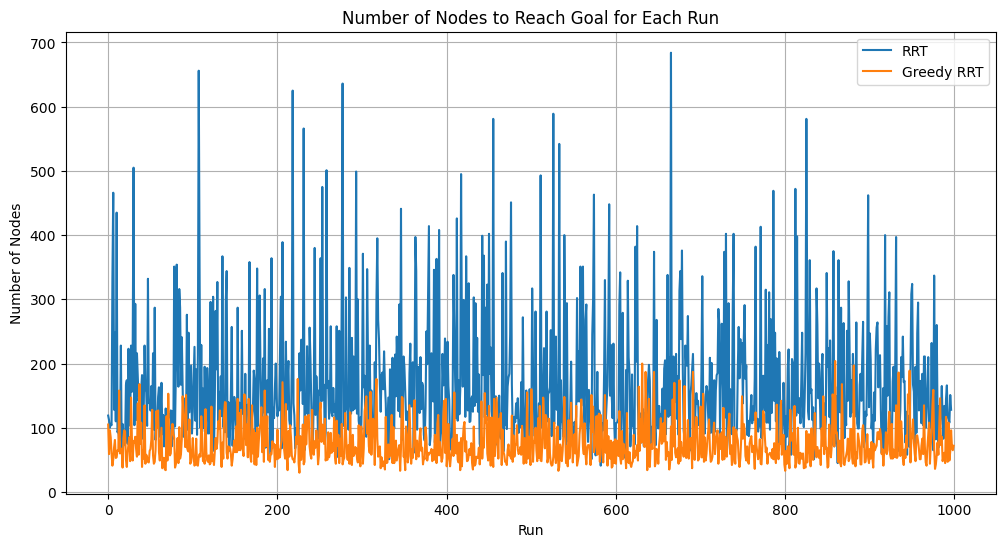

Average number of nodes (RRT): 168.3640922768305
Average number of nodes (Greedy RRT): 75.986


In [36]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.interpolate import splprep, splev

class Node:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.parent = None

# Finding distance between nodes 
def distance(node1, node2):
    dist =  np.sqrt((node1.x - node2.x)**2 + (node1.y - node2.y)**2)
    return dist

# Randomly select nodes from current 
def sample_random_node(width, height):
        # Random uniform chooses numbers between specified width/height 
    return Node(random.uniform(0, width), random.uniform(0, height))

# Finds the nearest node
def nearest_node(nodes, random_node):
    def distance_key(node):
        return distance(node, random_node)
    return min(nodes, key=distance_key)

def movement(from_node, to_node, max_dist):
    if distance(from_node, to_node) <= max_dist:
        return to_node
    theta = np.arctan2(to_node.y - from_node.y, to_node.x - from_node.x)
    return Node(from_node.x + max_dist * np.cos(theta), from_node.y + max_dist * np.sin(theta))

def possible_path(node1, node2, obstacles, safe=3):
    for x, y, w, h in obstacles:
        if x - safe <= min(node1.x, node2.x) <= x + w + safe and y - safe <= min(node1.y, node2.y) <= y + h + safe:
            return False
    return True
    

def rrt(start, goal, width, height, obstacles, max_dist, tolerance, max_iter=1000):
    nodes = [start]
    for i in range(max_iter):
        rand_node = sample_random_node(width, height)
        nearest = nearest_node(nodes, rand_node)
        new_node = movement(nearest, rand_node, max_dist)
        if possible_path(nearest, new_node, obstacles):
            new_node.parent = nearest
            nodes.append(new_node)
            if distance(new_node, goal) <= tolerance:
                goal.parent = new_node
                nodes.append(goal)
                return nodes
    return None

def smooth_path(path, obstacles, s=2):
    if not path:
        return path
    x = [node.x for node in path]
    y = [node.y for node in path]
    tck, u = splprep([x, y], s=s)
    unew = np.linspace(0, 1.0, num=500)
    out = splev(unew, tck)
    smooth_nodes = [Node(x, y) for x, y in zip(out[0], out[1])]
    return smooth_nodes

def greedy_sample_random_node(goal, width, height, greedy_factor=0.2):
    if random.random() < greedy_factor:
        return Node(goal.x + random.uniform(-5, 5), goal.y + random.uniform(-5, 5))
    else:
        return sample_random_node(width, height)

def rrt_with_greedy(start, goal, width, height, obstacles, max_dist, tolerance, max_iter=1000, greedy_factor=0.2):
    nodes = [start]
    for i in range(max_iter):
        rand_node = greedy_sample_random_node(goal, width, height, greedy_factor)
        nearest = nearest_node(nodes, rand_node)
        new_node = movement(nearest, rand_node, max_dist)
        if possible_path(nearest, new_node, obstacles):
            new_node.parent = nearest
            nodes.append(new_node)
            if distance(new_node, goal) <= tolerance:
                goal.parent = new_node
                nodes.append(goal)
                return nodes
    return None

def generate_path(nodes, start, goal):
    path = []
    node = goal
    while node is not None:
        path.append(node)
        node = node.parent
    return path[::-1]

def plot_environment(start, goal, width, height, obstacles, path=None, smoothed_path=None):
    plt.figure(figsize=(10, 10))
    if path==path_greedy:
        plt.xlabel("Greedy RRT Plot")
    else:
        plt.xlabel("RRT Plot")
    plt.plot(start.x, start.y, "ro")
    plt.plot(goal.x, goal.y, "go")
    plt.xlim(0, width)
    plt.ylim(0, height)
    for (ox, oy, ow, oh) in obstacles:
        plt.gca().add_patch(plt.Rectangle((ox, oy), ow, oh, color='k'))
    if path:
        px = [node.x for node in path]
        py = [node.y for node in path]
        plt.plot(px, py, 'b--')
    if smoothed_path:
        spx = [node.x for node in smoothed_path]
        spy = [node.y for node in smoothed_path]
        plt.plot(spx, spy, 'r-')
    plt.grid(True)
    plt.show()


# Parameters
width, height = 100, 100
obstacles = [(20, 20, 10, 10), (40, 40, 10, 10), (60, 60, 10, 10),(0, 0, 10, 100),(90, 0, 10, 100)]
start = Node(15, 15)
goal = Node(85, 80)
max_dist = 5
tolerance = 5

# Run RRT
nodes = rrt(start, goal, width, height, obstacles, max_dist, tolerance)
path = generate_path(nodes, start, goal)
smoothed_path = smooth_path(path, obstacles)

# Plot results
plot_environment(start, goal, width, height, obstacles, path, smoothed_path)

# Run Greedy RRT
nodes_greedy = rrt_with_greedy(start, goal, width, height, obstacles, max_dist, tolerance)
path_greedy = generate_path(nodes_greedy, start, goal)
smoothed_path_greedy = smooth_path(path_greedy, obstacles)

# Plot greedy algo results
plot_environment(start, goal, width, height, obstacles, path_greedy)

def average_nodes_rrt(runs, start, goal, width, height, obstacles, max_dist, tolerance, max_iter=1000):
    node_counts = []
    for _ in range(runs):
        nodes = rrt(start, goal, width, height, obstacles, max_dist, tolerance, max_iter)
        if nodes:
            node_counts.append(len(nodes))
    return node_counts

def average_nodes_rrt_greedy(runs, start, goal, width, height, obstacles, max_dist, tolerance, max_iter=1000, greedy_factor=0.2):
    node_counts = []
    for _ in range(runs):
        nodes = rrt_with_greedy(start, goal, width, height, obstacles, max_dist, tolerance, max_iter, greedy_factor)
        if nodes:
            node_counts.append(len(nodes))
    return node_counts

# Parameters for simulation
runs = 1000
width, height = 100, 100
obstacles = [(20, 20, 10, 10), (40, 40, 10, 10), (60, 60, 10, 10),(0, 0, 10, 100),(90, 0, 10, 100)]
start = Node(15, 15)
goal = Node(85, 80)
max_dist = 5
tolerance = 5

# Collect node counts for each run
nodes_count_rrt = average_nodes_rrt(runs, start, goal, width, height, obstacles, max_dist, tolerance)
nodes_count_rrt_greedy = average_nodes_rrt_greedy(runs, start, goal, width, height, obstacles, max_dist, tolerance)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(nodes_count_rrt, label='RRT')
plt.plot(nodes_count_rrt_greedy, label='Greedy RRT')
plt.xlabel('Run')
plt.ylabel('Number of Nodes')
plt.title('Number of Nodes to Reach Goal for Each Run')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and print average number of nodes
avg_nodes_rrt = np.mean(nodes_count_rrt)
avg_nodes_rrt_greedy = np.mean(nodes_count_rrt_greedy)
print(f"Average number of nodes (RRT): {avg_nodes_rrt}")
print(f"Average number of nodes (Greedy RRT): {avg_nodes_rrt_greedy}")
